<a href="https://colab.research.google.com/github/Abinayasree04/Gait_analysis/blob/main/gait_analysis_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building a new Employee Security System (AI & Machine Learning)**


In [5]:
#Extraction of ZIP file
import zipfile
import os


zip_path = "/human+activity+recognition+using+smartphones.zip"
extract_path = "/human_activity_dataset"

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listing the extracted files
file_list = os.listdir(extract_path)
print("Extracted Files:", file_list)
import os

for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}")
    for file in files:
        print(f"  - {file}")


Extracted Files: ['UCI HAR Dataset.names', 'UCI HAR Dataset.zip']
Directory: /human_activity_dataset
  - UCI HAR Dataset.names
  - UCI HAR Dataset.zip


In [2]:
import zipfile
import os

# Define the path to the uploaded ZIP file
zip_path = "/human_activity_dataset/UCI HAR Dataset.zip"
extract_path = "/human_activity_dataset/UCI HAR Dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listing all the extracted files
file_list = os.listdir(extract_path)
print("Extracted Files:", file_list)
import os

for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}")
    for file in files:
        print(f"  - {file}")

Extracted Files: ['UCI HAR Dataset', '__MACOSX']
Directory: /human_activity_dataset/UCI HAR Dataset
Directory: /human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset
  - features.txt
  - activity_labels.txt
  - README.txt
  - features_info.txt
  - .DS_Store
Directory: /human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/test
  - y_test.txt
  - X_test.txt
  - subject_test.txt
Directory: /human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals
  - body_gyro_z_test.txt
  - body_acc_z_test.txt
  - body_acc_y_test.txt
  - total_acc_y_test.txt
  - body_acc_x_test.txt
  - total_acc_z_test.txt
  - body_gyro_x_test.txt
  - total_acc_x_test.txt
  - body_gyro_y_test.txt
Directory: /human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/train
  - subject_train.txt
  - y_train.txt
  - X_train.txt
Directory: /human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals
  - body_gyro_y_train.txt
  - body_acc_x_train.txt
  - total_acc_z_train.txt
  - body_gyro

In [7]:
#Training the model with raw data to make it more accurate
#loading the inertial signals
import numpy as np
import os

# Function to load inertial signals (x, y, z axes) for a given signal type
def load_inertial_signals(folder_path, signal_type, dataset="train"):
    signals = []
    for axis in ['x', 'y', 'z']:
        file_path = os.path.join(folder_path, f"{signal_type}_{axis}_{dataset}.txt")
        if not os.path.exists(file_path):
            print(f"Error: File not found - {file_path}")
        data = np.loadtxt(file_path)
        signals.append(data)
    return np.stack(signals, axis=-1)


dataset_path = "/human_activity_dataset/UCI HAR Dataset"

# Loading all sensor data
X_train_acc = load_inertial_signals(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals", "body_acc", "train")
X_train_gyro = load_inertial_signals(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals", "body_gyro", "train")
X_train_total = load_inertial_signals(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals", "total_acc", "train")

X_test_acc = load_inertial_signals(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals", "body_acc", "test")
X_test_gyro = load_inertial_signals(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals", "body_gyro", "test")
X_test_total = load_inertial_signals(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals", "total_acc", "test")

# Combining all sensor data
X_train = np.concatenate([X_train_acc, X_train_gyro, X_train_total], axis=-1)
X_test = np.concatenate([X_test_acc, X_test_gyro, X_test_total], axis=-1)

# Loading labels
y_train = np.loadtxt(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt").astype(int) - 1
y_test = np.loadtxt(f"/human_activity_dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt").astype(int) - 1

# Printing dataset shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (7352, 128, 9)
Testing Data Shape: (2947, 128, 9)


In [8]:
#Normalization
from sklearn.preprocessing import StandardScaler
import numpy as np

# Reshaping data for normalization (samples * timesteps, features)
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshaping back to original shape (samples, timesteps, features)
X_train = X_train_scaled.reshape(X_train.shape)
X_test = X_test_scaled.reshape(X_test.shape)

print(f"Training Data Shape After Scaling: {X_train.shape}")
print(f"Testing Data Shape After Scaling: {X_test.shape}")


Training Data Shape After Scaling: (7352, 128, 9)
Testing Data Shape After Scaling: (2947, 128, 9)


In [9]:
#ML Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Defining LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer with softmax activation
])

# Compiling Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128, 64)             │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,614 (127.40 KB)

 Trainable params: 32,614 (127.40 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 39s 145ms/step - accuracy: 0.5895 - loss: 1.0638 - val_accuracy: 0.8673 - val_loss: 0.4223
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 31s 134ms/step - accuracy: 0.9309 - loss: 0.2068 - val_accuracy: 0.8935 - val_loss: 0.3292
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 44s 146ms/step - accuracy: 0.9503 - loss: 0.1374 - val_accuracy: 0.7791 - val_loss: 0.9242
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.9186 - loss: 0.2112 - val_accuracy: 0.9138 - val_loss: 0.2903
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.9453 - loss: 0.1409 - val_accuracy: 0.9121 - val_loss: 0.2696
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.9449 - loss: 0.1320 - val_accuracy: 0.8724 - val_loss: 0.4536
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 143ms/step - accuracy: 0.9288 - loss: 0.1812 - val_accuracy: 0.8799 - val_loss: 0.3961
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.9447 - loss: 0

In [11]:
# Evaluating model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.8770 - loss: 0.5241
Test Accuracy: 90.43%


In [14]:
#Saving the model
model.save("gait_authentication_model.keras")

In [15]:
#Verification if file is saved!!!
import os
print("Saved models:", [f for f in os.listdir() if f.endswith(".keras") or f.endswith(".h5")])


Saved models: ['gait_authentication_model.keras', 'gait_authentication_model.h5']


In [17]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Loading the trained model
model = load_model("gait_authentication_model.keras")

# Paths to the collected 4 employees' real-time datasets collected through physics toolbox suite
employee_files = ["/employee_1.csv", "/employee_2.csv", "/employee_3.csv", "/employee_4.csv"]
employees_data = []

for file in employee_files:
    df = pd.read_csv(file)
    df = df.iloc[:, 1:7]  # Extract only ax, ay, az, wx, wy, wz (ignoring time column) since the model is trained using the six columns excluding the time stamps

    employees_data.append(df)

# Convert list to array
employees_data = [data.to_numpy() for data in employees_data]

print("Loaded real-time gait datasets successfully!")


Loaded real-time gait datasets successfully!


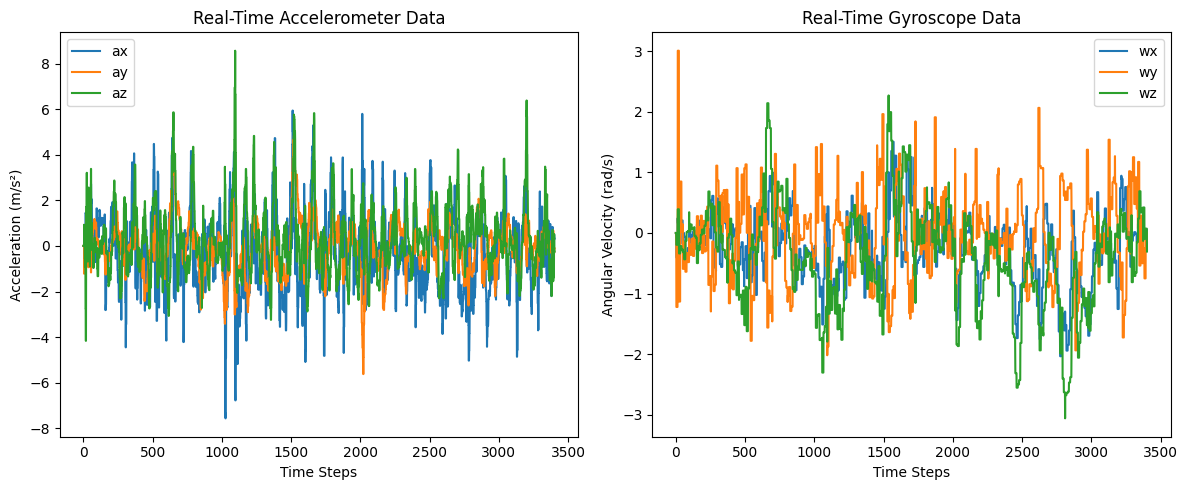

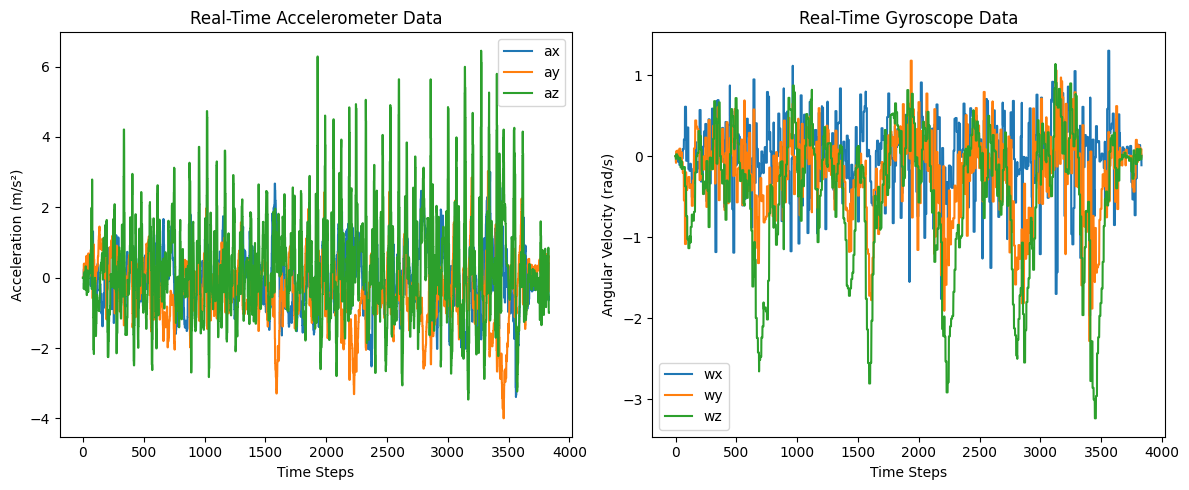

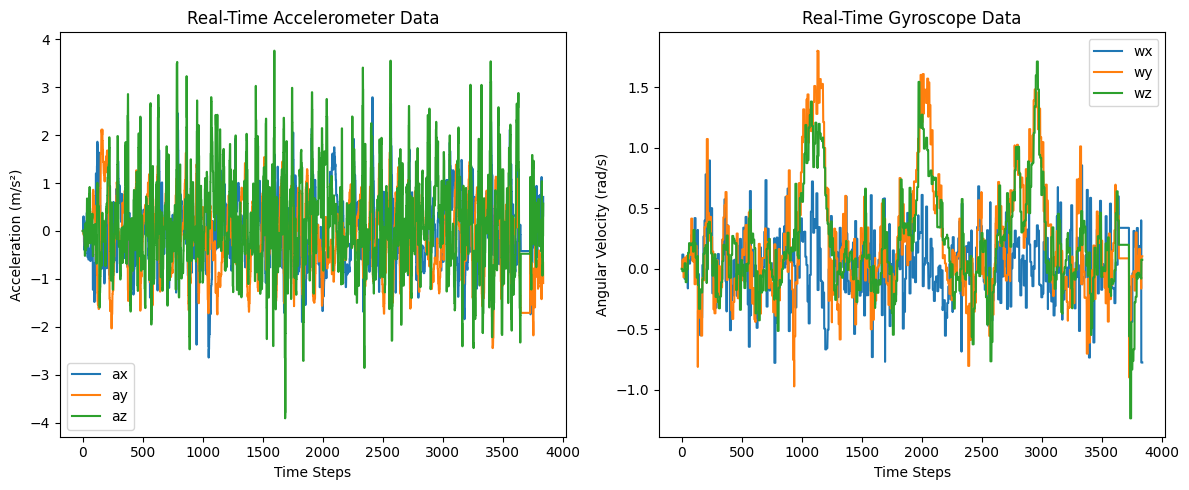

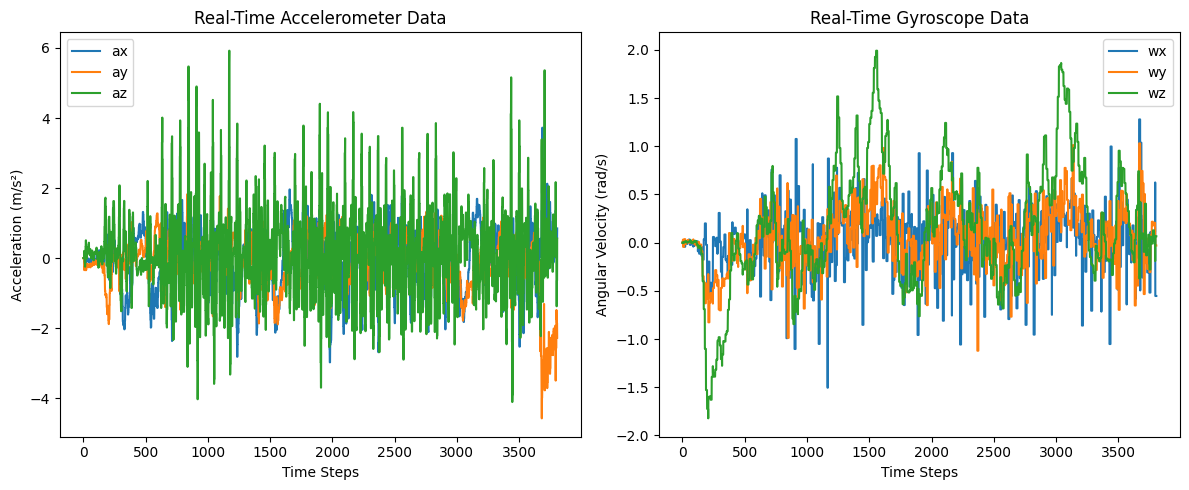

In [31]:
#Visual representation of real-time dataset for employee_1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Loading real-time test data
df = pd.read_csv("/employee_1.csv")
df = df.iloc[:, 1:7]

# Defining columns for plotting
time_steps = range(len(df))
acc_columns = ['ax', 'ay', 'az']
gyro_columns = ['wx', 'wy', 'wz']
plt.figure(figsize=(12, 5))

# Plot Accelerometer Data
plt.subplot(1, 2, 1)
for col in acc_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Accelerometer Data")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration (m/s²)")
plt.legend()

# Plot Gyroscope Data
plt.subplot(1, 2, 2)
for col in gyro_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Gyroscope Data")
plt.xlabel("Time Steps")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()

plt.tight_layout()
plt.show()

#Visual representation of real-time dataset for employee_2

df = pd.read_csv("/employee_2.csv")
df = df.iloc[:, 1:7]


time_steps = range(len(df))
acc_columns = ['ax', 'ay', 'az']
gyro_columns = ['wx', 'wy', 'wz']
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for col in acc_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Accelerometer Data")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration (m/s²)")
plt.legend()


plt.subplot(1, 2, 2)
for col in gyro_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Gyroscope Data")
plt.xlabel("Time Steps")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()

plt.tight_layout()
plt.show()


#Visual representation of real-time dataset for employee_3
df = pd.read_csv("/employee_3.csv")
df = df.iloc[:, 1:7]


time_steps = range(len(df))
acc_columns = ['ax', 'ay', 'az']
gyro_columns = ['wx', 'wy', 'wz']

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
for col in acc_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Accelerometer Data")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration (m/s²)")
plt.legend()


plt.subplot(1, 2, 2)
for col in gyro_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Gyroscope Data")
plt.xlabel("Time Steps")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()

plt.tight_layout()
plt.show()


#Visual representation of real-time dataset for employee_4
df = pd.read_csv("/employee_4.csv")
df = df.iloc[:, 1:7]


time_steps = range(len(df))
acc_columns = ['ax', 'ay', 'az']
gyro_columns = ['wx', 'wy', 'wz']

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
for col in acc_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Accelerometer Data")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration (m/s²)")
plt.legend()


plt.subplot(1, 2, 2)
for col in gyro_columns:
    plt.plot(time_steps, df[col], label=col)
plt.title("Real-Time Gyroscope Data")
plt.xlabel("Time Steps")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# Function to segment data into 128 timesteps (matching training data format)
def segment_data(data, window_size=128):
    segments = []
    for i in range(0, len(data) - window_size, window_size):
        segments.append(data[i:i + window_size])
    return np.array(segments)

# Segmenting all 4 employee datasets
segmented_data = [segment_data(data) for data in employees_data]

# Flattening the list
X_test_real = np.concatenate(segmented_data, axis=0)

print(f"Segmented Data Shape: {X_test_real.shape}")


Segmented Data Shape: (113, 128, 6)


In [19]:
# Loading the same scaler used in training
scaler = StandardScaler()

# Reshaping for normalization (samples * timesteps, features)
X_test_reshaped = X_test_real.reshape(-1, X_test_real.shape[-1])

# Normalize
X_test_scaled = scaler.fit_transform(X_test_reshaped)

# Reshaping back to original (samples, 128, 6)
X_test_real = X_test_scaled.reshape(X_test_real.shape)

print(f"Normalized Test Data Shape: {X_test_real.shape}")


Normalized Test Data Shape: (113, 128, 6)


In [27]:
import numpy as np



predictions = model.predict(X_test_real_padded)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get unique predictions per employee
unique_preds = list(set(predicted_classes))  # Remove duplicates

# Display only one result per unique prediction
for pred in unique_preds:
    if pred in [0, 1, 2, 3]:  # Only expected employees
        print(f"✅ Employee ID {pred} recognized. ✅ Access Granted.")
    else:
        print("🚫 Unknown gait pattern detected. ❌ Access Denied.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
✅ Employee ID 0 recognized. ✅ Access Granted.
✅ Employee ID 1 recognized. ✅ Access Granted.
✅ Employee ID 2 recognized. ✅ Access Granted.
✅ Employee ID 3 recognized. ✅ Access Granted.
🚫 Unknown gait pattern detected. ❌ Access Denied.
🚫 Unknown gait pattern detected. ❌ Access Denied.


In [36]:
!pip install gradio
import gradio as gr
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib

# Loading trained model
model = tf.keras.models.load_model("/content/gait_authentication_model.keras")


# Prediction function
def authenticate_gait(file):
    df = pd.read_csv(file)

    # Check if the file has the correct features
    if df.shape[1] != 6:
        return "⚠️ Invalid file format! Please upload a valid gait data CSV file."

    # Reshaping and predicting
    df = np.expand_dims(df.values, axis=0)
    prediction = model.predict(df)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Decode Employee ID
    employee_id = encoder.inverse_transform([predicted_class])[0]

    return f"✅ Employee ID {employee_id} recognized. ✅ Access Granted."

# Create Gradio UI
iface = gr.Interface(
    fn=authenticate_gait,
    inputs=gr.File(),
    outputs="text",
    title="🚶 Gait Authentication System",
    description="Upload a gait data CSV file to authenticate an employee."
)

# Launch the app
iface.launch(share=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f5f32a0c55088ab627.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
